# Multiple Lineal Regression practice with students performance dataset from Kaggle.

### Importing needed packages

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import linear_model



### Reading the dataset

In [3]:
data = pd.read_csv('Student_Performance.csv')

Shape

In [10]:
data.shape

(10000, 6)

Data types

In [4]:
data.info() #We can observe that there aren´t no Non-Null rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Data Visualization

In [6]:
data.head(10) #Data visualization. First 10 rows.

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


### Study of linearity of the data

Conversion of Extracurricular activities from boolean to int type in order to make it usable in the regression

In [7]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes':1,'No':0})

In [8]:
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


Performance vs Studied Hours Linearity

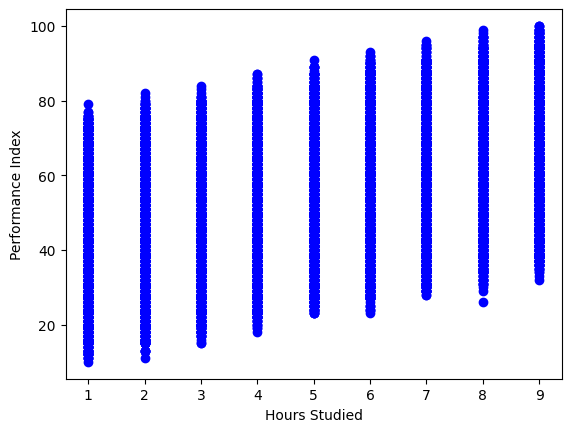

In [9]:
plt.scatter(data['Hours Studied'], data['Performance Index'], color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.show()

Performance vs Extracurricular Activities Linearity

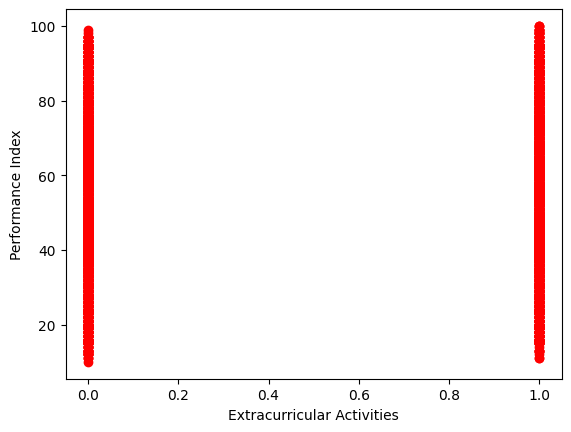

In [10]:
plt.scatter(data['Extracurricular Activities'], data['Performance Index'], color='red')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.show()

We can see that this column does not carry any usefull data, so we must drop it form de df

In [11]:
data= data.drop(columns=['Extracurricular Activities'])
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Performance vs Previous Scores Linearity

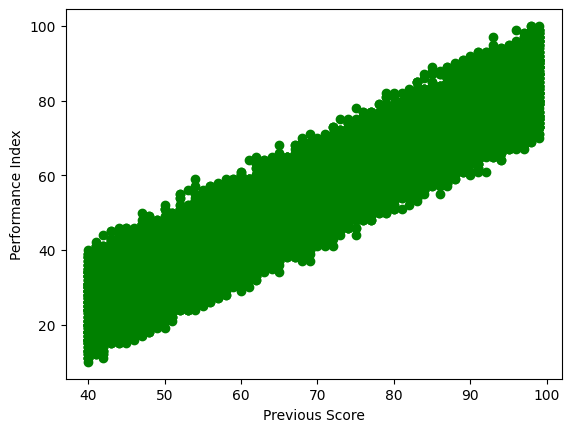

In [12]:
plt.scatter(data['Previous Scores'], data['Performance Index'], color='green')
plt.xlabel('Previous Score')
plt.ylabel('Performance Index')
plt.show()


Performance vs Sleep Hours Linearity

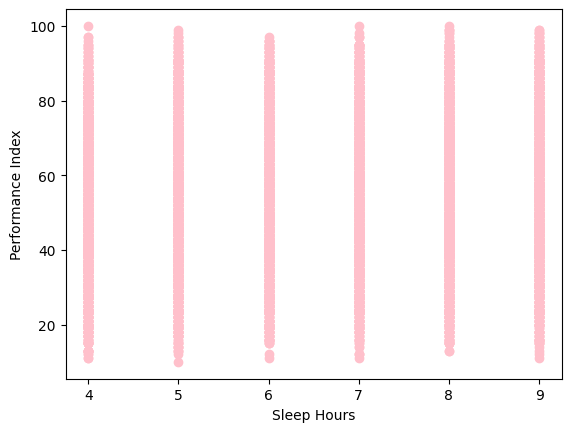

In [13]:
plt.scatter(data['Sleep Hours'], data['Performance Index'], color='pink')
plt.xlabel('Sleep Hours')
plt.ylabel('Performance Index')
plt.show()

In principle, I don´t see relationship between Sleep Hours and Performance Index in terms of linearity, so I will drop this column off the df

In [14]:
data = data.drop(columns='Sleep Hours')
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced',
       'Performance Index'],
      dtype='object')

Performance vs Sample Question Papers Practiced Linearity

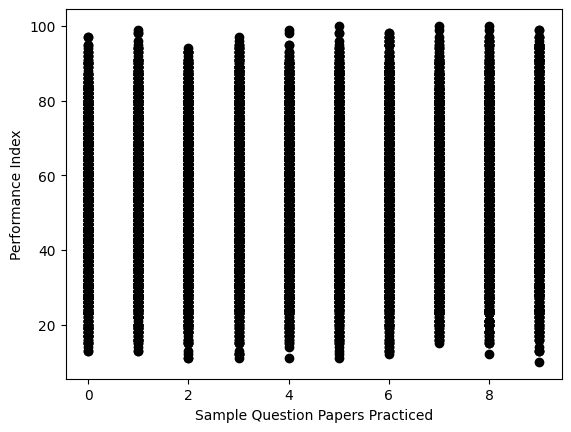

In [15]:
plt.scatter(data['Sample Question Papers Practiced'], data['Performance Index'], color='black')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

In principle, I don´t see relationship between Sample Question Practiced and Performance Index in terms of linearity, so I will drop this column off the df

In [16]:
data=data.drop(columns='Sample Question Papers Practiced')
data.columns

Index(['Hours Studied', 'Previous Scores', 'Performance Index'], dtype='object')

Scatter plot Matrix

<Figure size 1200x800 with 0 Axes>

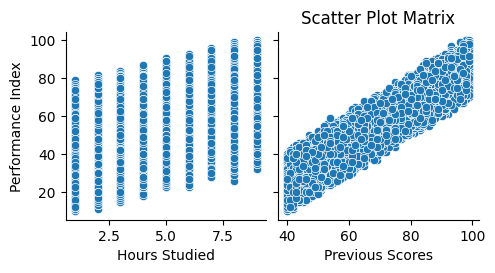

In [17]:
plt.figure(figsize=(12,8))
sns.pairplot(data,x_vars=data[['Hours Studied', 'Previous Scores']], y_vars=['Performance Index'])
plt.title('Scatter Plot Matrix')
plt.show()

Now that we hace studied the 2D linearity between columns and filtered the df, we are going to plot 3D graphic with the columns and data we are going to use.

In [18]:
fig3d = px.scatter_3d(data, x='Hours Studied', y='Previous Scores', z='Performance Index')
fig3d.show()

It can be observed that there exists linearity relation between the 2 independent variables and the dependent variable (target).

### Train/test split and model creation and train

First we extract the columns from de df that we will use as independent and dependent variables

In [24]:
X=data[['Hours Studied','Previous Scores']] #Independent variables
y=data['Performance Index'] #Dependent variable

#Other way to do it could be:
#X_2=data.iloc[:,0:2]
#y_2=data.iloc[:,-1]

In [25]:
X.head(10)

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75
5,3,78
6,7,73
7,8,45
8,5,77
9,4,89


In [26]:
y.head(10)

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
5    61.0
6    63.0
7    42.0
8    61.0
9    69.0
Name: Performance Index, dtype: float64

Now we use train/test split function from sklearn. We will do a 80/20 split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [29]:
model = linear_model.LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

Intercept point and coefficients

In [31]:
print("Coeficient:", [(col, float(coef)) for col, coef in zip(X.columns, model.coef_.flatten())]) 
print("Intercept o Sesgo:",model.intercept_)

Coeficiente: [('Hours Studied', 2.852214236957583), ('Previous Scores', 1.0186040132419867)]
Intercept o Sesgo: -29.747571182852354


### Performance Index Prediction

In [32]:
y_pred = model.predict(X_test)


In [36]:
y_df=pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
print(y_df)

      Predicted  Actual
5326  16.701018    20.0
9875  54.797177    58.0
9172  88.207512    88.0
341   42.166733    40.0
7872  83.114491    86.0
...         ...     ...
5076  71.909232    70.0
8534  73.946440    75.0
2249  14.867408    15.0
1278  75.373470    75.0
9316  81.688692    85.0

[2000 rows x 2 columns]


### Score Metrics of the model and 3D plot of the hyperplane

Plot of the hyperplane of the model

Ecuation of the plane

In [38]:
print('ECUATION OF THE PLANE: y = {}*HOURS STUDIED + {}*PREVIOUS SCORE + {} '.format(round(model.coef_[0],3), round(model.coef_[1],3), round(model.intercept_,3)))

ECUATION OF THE PLANE: y = 2.852*HOURS STUDIED + 1.019*PREVIOUS SCORE + -29.748 


Score metrics. MSE and R2 score

In [44]:
#MSE 

print("Mean Squared Error (MSE) : %.2f" % np.mean((y_pred - y_test) ** 2))

#R^2 o variance score, 1 is perfect prediction

print('Variance score: %.4f' % model.score(X_test, y_test))

Mean Squared Error (MSE) : 5.20
Variance score: 0.9860
